In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

pd.options.display.max_columns = 999

In [2]:
df = pd.read_csv('./CSVs/full_merged_data.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)

In [3]:
df.head()

,Team,OFFENSE: Pts/Poss,OFFENSE: eFG%,OFFENSE: TOV%,OFFENSE: ORB%,OFFENSE: FT Rate,DEFENSE: Pts/Poss,DEFENSE: eFG%,DEFENSE: TOV%,DEFENSE: ORB%,DEFENSE: FT Rate,year,team_year,eFG%,Loc eFG%,Accuracy at Rim,Accuracy on Short Midrange,Accuracy on Long Midrange,Accuracy on All Midrange,Accuracy on Corner Threes,Accuracy on Non Corner Threes,Accuracy on All Threes,HALFCOURT: Pts/Play,HALFCOURT: OREB%,HALFCOURT: % of Plays,PUTBACKS: Pts/Miss,PUTBACKS: Plays/Miss,PUTBACKS: Pts/Play,ALL TRANSITION: Pts+/Poss,ALL TRANSITION: Freq,ALL TRANSITION: Pts/Play,OFF STEALS: Pts+/Poss,OFF STEALS: Freq,OFF STEALS: Pts/Play,OFF LIVE REBOUNDS: Pts+/Poss,OFF LIVE REBOUNDS: Freq,OFF LIVE REBOUNDS: Pts/Play,Frequency Rim,Frequency Short Midrange,Frequency Long Midrange,Frequency all Midrange,Frequency Corner Threes,Frequency Non Corner Threes,Frequency All Threes
0,Average,105.8,0.499,0.157,0.291,20.4,105.8,0.499,0.157,0.291,20.4,2013,Average 2013,0.499,0.504,0.604,0.384,0.396,0.391,0.390,0.358,0.367,87.4,0.294,0.802,19.0,17.5,105.5,3.7,0.141,125.4,2.1,0.582,140.1,1.7,0.266,117.6,0.364,0.185,0.231,0.416,0.063,0.158,0.220
1,Oklahoma City,112.2,0.529,0.161,0.286,28.6,101.7,0.471,0.157,0.293,19.2,2013,Oklahoma City 2013,0.529,0.501,0.652,0.409,0.423,0.417,0.423,0.362,0.378,93.0,0.289,0.787,20.4,18.4,108.7,5.8,0.157,135.8,2.8,0.622,147.3,2.9,0.285,129.2,0.354,0.193,0.236,0.430,0.058,0.158,0.216
2,Miami,113.4,0.557,0.152,0.252,22.6,104.2,0.494,0.171,0.309,19.9,2013,Miami 2013,0.557,0.509,0.682,0.392,0.437,0.419,0.433,0.386,0.405,98.3,0.252,0.815,15.4,13.5,112.0,3.8,0.149,125.1,2.3,0.588,139.8,1.6,0.272,116.8,0.355,0.165,0.225,0.390,0.104,0.151,0.255
3,LA Clippers,111.5,0.529,0.160,0.315,20.4,103.7,0.496,0.177,0.294,22.9,2013,LA Clippers 2013,0.529,0.508,0.658,0.421,0.406,0.412,0.387,0.353,0.365,90.9,0.327,0.780,20.6,18.5,108.5,4.7,0.171,126.1,2.9,0.636,143.5,1.8,0.294,116.9,0.364,0.165,0.229,0.394,0.086,0.156,0.242
4,San Antonio,108.0,0.531,0.154,0.232,20.6,101.1,0.482,0.156,0.271,18.0,2013,San Antonio 2013,0.532,0.509,0.634,0.417,0.425,0.421,0.412,0.360,0.379,95.1,0.235,0.820,13.4,12.3,106.8,2.6,0.145,117.3,1.9,0.573,134.6,0.7,0.263,107.3,0.373,0.192,0.196,0.387,0.088,0.152,0.240


## KMeans Clustering Model

In [4]:
features = ['HALFCOURT: % of Plays', 'HALFCOURT: OREB%', 'ALL TRANSITION: Freq', 'Frequency Rim', 'Frequency Short Midrange',
           'Frequency Long Midrange', 'Frequency all Midrange', 'Frequency Corner Threes', 'Frequency Non Corner Threes', 'Frequency All Threes']

In [5]:
# Define X
X = df[features]

In [6]:
# Scale the data
ss = StandardScaler()                          
X_scaled = ss.fit_transform(X)

In [7]:
km = KMeans(n_clusters = 3, random_state=42)
km.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

C:\Users\aorfa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


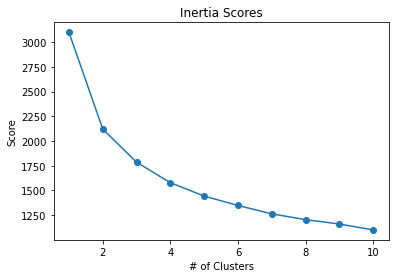

In [8]:
# at which point is our elbow?  Seems to be around 3

inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Inertia Scores');

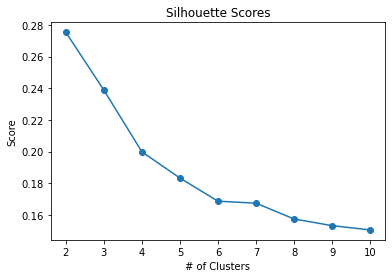

In [9]:
silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))

plt.plot(range(2, 11), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

In [10]:
# Add cluster label to each record
df['cluster'] = km.labels_

In [11]:
# how much data is in each cluster?
df['cluster'].value_counts(normalize = True)

0    0.400000
1    0.364516
2    0.235484
Name: cluster, dtype: float64

In [12]:
df['cluster'].value_counts()

0    124
1    113
2     73
Name: cluster, dtype: int64

## Post-Model EDA

In [13]:
# Add column called "made_finals", "won_championship" columns

df['won_championship'] = 0
df.loc[[2],'won_championship'] = 1 #2013 Miami Heat
df.loc[[32],'won_championship'] = 1 #2014 San Antonio Spurs
df.loc[[63],'won_championship'] = 1 #2015 Golden State Warriors
df.loc[[97],'won_championship'] = 1 #2016 Cleveland Cavaliers
df.loc[[125],'won_championship'] = 1 #2017 Golden State Warriors
df.loc[[158],'won_championship'] = 1 #2018 Golden State Warriors
df.loc[[190],'won_championship'] = 1 #2019 Toronto Raptors
df.loc[[222],'won_championship'] = 1 #2020 Los Angeles Lakers
df.loc[[253],'won_championship'] = 1 #2021 Milwaukee Bucks

df['made_finals'] = 0
df.loc[[2], 'made_finals'] = 1 #2013 Miami Heat
df.loc[[4], 'made_finals'] = 1 #2013 San Antonio Spurs
df.loc[[32], 'made_finals'] = 1 #2014 San Antonio Spurs
df.loc[[36], 'made_finals'] = 1 # 2014 Miami Heat
df.loc[[63], 'made_finals'] = 1 #2015 Golden State Warriors
df.loc[[67], 'made_finals'] = 1 #2015 Cleveland Cavaliers
df.loc[[97], 'made_finals'] = 1 #2016 Cleveland Cavaliers
df.loc[[95], 'made_finals'] = 1 #2016 Golden State Warriors
df.loc[[125], 'made_finals'] = 1 #2017 Golden State Warriors
df.loc[[130], 'made_finals'] = 1 #2017 Cleveland Cavaliers
df.loc[[158], 'made_finals'] = 1 #2018 Golden State Warriors
df.loc[[170], 'made_finals'] = 1 #2018 Cleveland Cavaliers
df.loc[[190], 'made_finals'] = 1 #2019 Toronto Raptors
df.loc[[188], 'made_finals'] = 1 #2019 Golden State Warriors
df.loc[[222], 'made_finals'] = 1 #2020 Los Angeles Lakers
df.loc[[224], 'made_finals'] = 1 #2020 Miami Heat
df.loc[[253], 'made_finals'] = 1 #2021 Milwaukee Bucks
df.loc[[251], 'made_finals'] = 1 #2021 Phoenix Suns

In [14]:
df.head()

,Team,OFFENSE: Pts/Poss,OFFENSE: eFG%,OFFENSE: TOV%,OFFENSE: ORB%,OFFENSE: FT Rate,DEFENSE: Pts/Poss,DEFENSE: eFG%,DEFENSE: TOV%,DEFENSE: ORB%,DEFENSE: FT Rate,year,team_year,eFG%,Loc eFG%,Accuracy at Rim,Accuracy on Short Midrange,Accuracy on Long Midrange,Accuracy on All Midrange,Accuracy on Corner Threes,Accuracy on Non Corner Threes,Accuracy on All Threes,HALFCOURT: Pts/Play,HALFCOURT: OREB%,HALFCOURT: % of Plays,PUTBACKS: Pts/Miss,PUTBACKS: Plays/Miss,PUTBACKS: Pts/Play,ALL TRANSITION: Pts+/Poss,ALL TRANSITION: Freq,ALL TRANSITION: Pts/Play,OFF STEALS: Pts+/Poss,OFF STEALS: Freq,OFF STEALS: Pts/Play,OFF LIVE REBOUNDS: Pts+/Poss,OFF LIVE REBOUNDS: Freq,OFF LIVE REBOUNDS: Pts/Play,Frequency Rim,Frequency Short Midrange,Frequency Long Midrange,Frequency all Midrange,Frequency Corner Threes,Frequency Non Corner Threes,Frequency All Threes,cluster,won_championship,made_finals
0,Average,105.8,0.499,0.157,0.291,20.4,105.8,0.499,0.157,0.291,20.4,2013,Average 2013,0.499,0.504,0.604,0.384,0.396,0.391,0.390,0.358,0.367,87.4,0.294,0.802,19.0,17.5,105.5,3.7,0.141,125.4,2.1,0.582,140.1,1.7,0.266,117.6,0.364,0.185,0.231,0.416,0.063,0.158,0.220,1,0,0
1,Oklahoma City,112.2,0.529,0.161,0.286,28.6,101.7,0.471,0.157,0.293,19.2,2013,Oklahoma City 2013,0.529,0.501,0.652,0.409,0.423,0.417,0.423,0.362,0.378,93.0,0.289,0.787,20.4,18.4,108.7,5.8,0.157,135.8,2.8,0.622,147.3,2.9,0.285,129.2,0.354,0.193,0.236,0.430,0.058,0.158,0.216,1,0,0
2,Miami,113.4,0.557,0.152,0.252,22.6,104.2,0.494,0.171,0.309,19.9,2013,Miami 2013,0.557,0.509,0.682,0.392,0.437,0.419,0.433,0.386,0.405,98.3,0.252,0.815,15.4,13.5,112.0,3.8,0.149,125.1,2.3,0.588,139.8,1.6,0.272,116.8,0.355,0.165,0.225,0.390,0.104,0.151,0.255,1,1,1
3,LA Clippers,111.5,0.529,0.160,0.315,20.4,103.7,0.496,0.177,0.294,22.9,2013,LA Clippers 2013,0.529,0.508,0.658,0.421,0.406,0.412,0.387,0.353,0.365,90.9,0.327,0.780,20.6,18.5,108.5,4.7,0.171,126.1,2.9,0.636,143.5,1.8,0.294,116.9,0.364,0.165,0.229,0.394,0.086,0.156,0.242,2,0,0
4,San Antonio,108.0,0.531,0.154,0.232,20.6,101.1,0.482,0.156,0.271,18.0,2013,San Antonio 2013,0.532,0.509,0.634,0.417,0.425,0.421,0.412,0.360,0.379,95.1,0.235,0.820,13.4,12.3,106.8,2.6,0.145,117.3,1.9,0.573,134.6,0.7,0.263,107.3,0.373,0.192,0.196,0.387,0.088,0.152,0.240,1,0,1


In [15]:
# Add "made_playoffs" column
playoffs_2013 = ['Miami 2013', 'Milwaukee 2013', 'Brooklyn 2013', 'Chicago 2013', 'Indiana 2013', 'Atlanta 2013', 'New York 2013', 'Boston 2013',
                 'Oklahoma City 2013', 'Houston 2013', 'LA Clippers 2013', 'Memphis 2013', 'Denver 2013', 'Golden State 2013', 'San Antonio 2013', 'LA Lakers 2013'] 
playoffs_2014 = ['Indiana 2014', 'Miami 2014', 'Toronto 2014', 'Chicago 2014', 'Washington 2014', 'Brooklyn 2014', 'Charlotte 2014', 'Atlanta 2014',
                 'San Antonio 2014', 'Oklahoma City 2014', 'LA Clippers 2014', 'Houston 2014', 'Portland 2014', 'Golden State 2014', 'Memphis 2014', 'Dallas 2014']
playoffs_2015 = ['Atlanta 2015', 'Brooklyn 2015', 'Toronto 2015', 'Washington 2015', 'Chicago 2015', 'Milwaukee 2015', 'Cleveland 2015', 'Boston 2015',
                'Golden State 2015', 'New Orleans 2015', 'Portland 2015', 'Memphis 2015', 'LA Clippers 2015', 'San Antonio 2015', 'Houston 2015', 'Dallas 2015']
playoffs_2016 = ['Cleveland 2016', 'Detroit 2016', 'Atlanta 2016', 'Boston 2016', 'Miami 2016', 'Charlotte 2016', 'Toronto 2016', 'Indiana 2016',
                'Golden State 2016', 'Houston 2016', 'LA Clippers 2016', 'Portland 2016', 'Oklahoma City 2016', 'Dallas 2016', 'San Antonio 2016', 'Memphis 2016']
playoffs_2017 = ['Boston 2017', 'Chicago 2017', 'Washington 2017', 'Atlanta 2017', 'Toronto 2017', 'Milwaukee 2017', 'Cleveland 2017', 'Indiana 2017',
                 'Golden State 2017', 'Portland 2017', 'LA Clippers 2017', 'Utah 2017', 'Houston 2017', 'Oklahoma City 2017', 'San Antonio 2017', 'Memphis 2017']
playoffs_2018 = ['Toronto 2018', 'Washington 2018', 'Cleveland 2018', 'Indiana 2018', 'Philadelphia 2018', 'Miami 2018', 'Boston 2018', 'Milwaukee 2018',
                'Houston 2018', 'Minnesota 2018', 'Oklahoma City 2018', 'Utah 2018', 'Portland 2018', 'New Orleans 2018', 'Golden State 2018', 'San Antonio 2018']
playoffs_2019 = ['Milwaukee 2019', 'Detroit 2019', 'Boston 2019', 'Indiana 2019', 'Philadelphia 2019', 'Brooklyn 2019', 'Toronto 2019', 'Orlando 2019',
                 'Golden State 2019', 'LA Clippers 2019', 'Houston 2019', 'Utah 2019', 'Portland 2019', 'Oklahoma City 2019', 'Denver 2019', 'San Antonio 2019']
playoffs_2020 = ['Milwaukee 2020', 'Orlando 2020', 'Indiana 2020', 'Miami 2020', 'Boston 2020', 'Philadelphia 2020', 'Toronto 2020', 'Brooklyn 2020',
                'LA Lakers 2020', 'Portland 2020', 'Houston 2020', 'Oklahoma City 2020', 'Denver 2020', 'Utah 2020', 'LA Clippers 2020', 'Dallas 2020']
playoffs_2021 = ['Philadelphia 2021', 'Washington 2021', 'New York 2021', 'Atlanta 2021', 'Milwaukee 2021', 'Miami 2021', 'Brooklyn 2021', 'Boston 2021',
                'Utah 2021', 'Memphis 2021', 'LA Clippers 2021', 'Dallas 2021', 'Denver 2021', 'Portland 2021', 'Phoenix 2021', 'LA Lakers 2021']

# create full list of all teams that made the playoffs
made_playoffs = playoffs_2013 + playoffs_2014 + playoffs_2015 + playoffs_2016 + playoffs_2017 + playoffs_2018 + playoffs_2019 + playoffs_2020 + playoffs_2021
# create new column 'made_playoffs' and insert a value of 1 for all teams that made it, and 0 for teams that didn't make it.
df['made_playoffs'] = np.where(df.team_year.isin(made_playoffs), 1, 0)

In [16]:
# now that we've got columns identifying team performance (playoffs, finals, championship), save to a new csv
df.to_csv('./CSVs/clusters_with_performance.csv')
df.to_excel('./CSVs/clusters_with_performance.xlsx')

### What are the playing styles of our clusters?

In [17]:
df.groupby(by = 'cluster').mean().T

cluster,0,1,2
OFFENSE: Pts/Poss,110.950806,106.511504,108.741096
OFFENSE: eFG%,0.532790,0.501885,0.517548
OFFENSE: TOV%,0.142298,0.147788,0.150904
OFFENSE: ORB%,0.252492,0.272664,0.277671
OFFENSE: FT Rate,19.509677,20.672566,20.778082
DEFENSE: Pts/Poss,110.818548,107.002655,108.205479
DEFENSE: eFG%,0.530032,0.506504,0.515274
DEFENSE: TOV%,0.141403,0.148796,0.150973
DEFENSE: ORB%,0.257105,0.272850,0.271123
DEFENSE: FT Rate,19.536290,20.569912,20.890411


In [18]:
df.groupby('cluster')['Frequency All Threes'].mean()

cluster
0    0.360871
1    0.239053
2    0.280973
Name: Frequency All Threes, dtype: float64

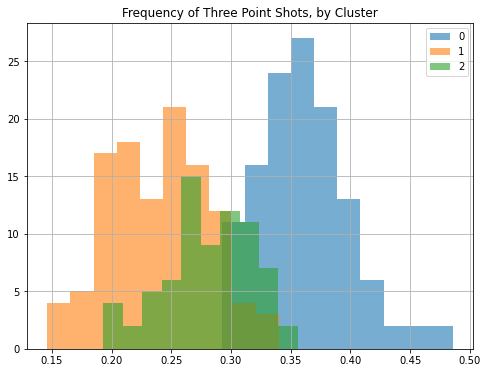

In [19]:
plt.figure(figsize=(8,6))
df.groupby('cluster')['Frequency All Threes'].hist(legend = True, alpha = .6)
plt.title('Frequency of Three Point Shots, by Cluster')
plt.legend()
plt.savefig("./Visuals/Frequency Threes by Cluster.jpg", bbox_inches="tight", dpi=100);

##### Cluster 0 in blue, by far shooting the most 3-pointers.  Cluster 0 playing style is the most analytics driven.

##### Other things tie back to the 3-point boom too.  Offensive rebounds for example...

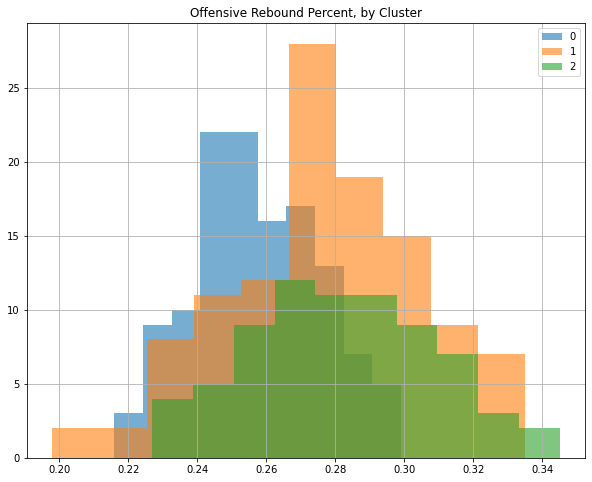

In [20]:
plt.figure(figsize=(10,8))
df.groupby('cluster')['HALFCOURT: OREB%'].hist(legend = True, alpha = .6)
plt.title('Offensive Rebound Percent, by Cluster')
plt.legend()
plt.savefig("./Visuals/Offensive Rebound Percent, by Cluster.jpg", bbox_inches="tight", dpi=100);

##### Cluster 0 teams go for less offensive rebounds than the other clusters.  Why?  Because offensive rebounds leaves less defenders back to defend against the other team's transition play.  Yes, transition has always been a possibility off of offensive rebounds, so why the shift now?  Teams are now hunting 3-pointers in transition!  Make sense from an offensive standpoint.  Transition = no set defense = wide open looks.  From a defensive standpoint, are you OK with Steph Curry getting a wide-open look at 3 in transition, just to have a chance at an offensive rebound?  You can understand why teams are saying no more often.

### How did each cluster do from performance standpoint?

In [21]:
newdf = df.loc[(df['Team'] != 'Average') & (df['year'] != 2022)]

In [22]:
newdf['made_playoffs'].value_counts()

1    144
0    126
Name: made_playoffs, dtype: int64

In [23]:
newdf.groupby(by = 'cluster')['made_finals'].mean().T

cluster
0    0.087912
1    0.027523
2    0.100000
Name: made_finals, dtype: float64

In [24]:
newdf.groupby(by = 'cluster')['won_championship'].mean().T

cluster
0    0.032967
1    0.018349
2    0.057143
Name: won_championship, dtype: float64

In [25]:
newdf.groupby(by = 'cluster')['made_playoffs'].mean().T

cluster
0    0.571429
1    0.513761
2    0.514286
Name: made_playoffs, dtype: float64

##### Cluster 0 stands out on a league-wide level.  Playing that style has been 10%+ more successful than the other 2 clusters' playing styles, in terms of making the playoffs.  However the best of the best seem to come from Cluster 2 more often.  Cluster 2 teams make the finals and win the championship at the highest rate among the three clusters.

### What does the distribution of `year` in each cluster look like?

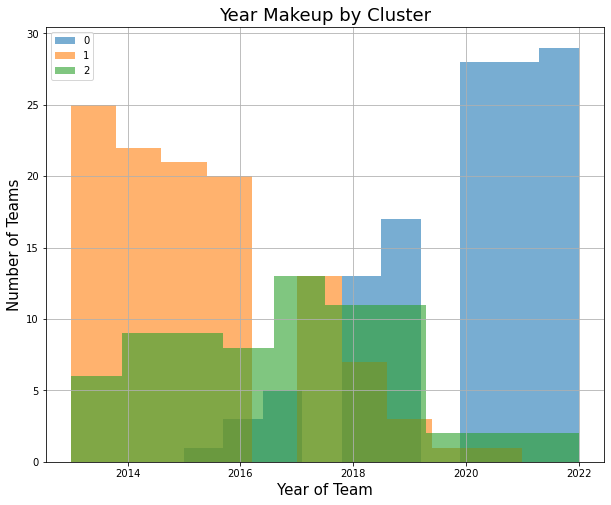

In [26]:
plt.figure(figsize=(10,8))
df.groupby('cluster')['year'].hist(legend = True, alpha = .6)
plt.title('Year Makeup by Cluster', fontsize = 18)
plt.xticks()
plt.ylabel('Number of Teams', fontsize = 15)
plt.xlabel('Year of Team', fontsize = 15)
plt.legend()
plt.savefig("./Visuals/Year Makeup Hist, by Cluster.jpg", bbox_inches="tight", dpi=100);

In [27]:
df.groupby('cluster')['year'].mean()

cluster
0    2020.088710
1    2015.159292
2    2016.726027
Name: year, dtype: float64

#### Average Year by Cluster:
* Cluster 0: 2020 - 'modern style'

* Cluster 1: 2015 - 'old style'

* Cluster 2: 2017

In [28]:
df.groupby('cluster')['year'].value_counts()

cluster  year
0        2022    29
         2020    28
         2021    28
         2019    17
         2018    13
         2017     5
         2016     3
         2015     1
1        2013    25
         2014    22
         2015    21
         2016    20
         2017    13
         2018     7
         2019     3
         2020     1
         2021     1
2        2017    13
         2018    11
         2019    11
         2014     9
         2015     9
         2016     8
         2013     6
         2020     2
         2021     2
         2022     2
Name: year, dtype: int64

#### who are the 2020/21 teams that are in "old-style" Cluster 1.  These teams are playing a "that's-so-yesterday" style of basketball.


In [29]:
df.loc[(df.year == 2020) & (df.cluster == 1)]

,Team,OFFENSE: Pts/Poss,OFFENSE: eFG%,OFFENSE: TOV%,OFFENSE: ORB%,OFFENSE: FT Rate,DEFENSE: Pts/Poss,DEFENSE: eFG%,DEFENSE: TOV%,DEFENSE: ORB%,DEFENSE: FT Rate,year,team_year,eFG%,Loc eFG%,Accuracy at Rim,Accuracy on Short Midrange,Accuracy on Long Midrange,Accuracy on All Midrange,Accuracy on Corner Threes,Accuracy on Non Corner Threes,Accuracy on All Threes,HALFCOURT: Pts/Play,HALFCOURT: OREB%,HALFCOURT: % of Plays,PUTBACKS: Pts/Miss,PUTBACKS: Plays/Miss,PUTBACKS: Pts/Play,ALL TRANSITION: Pts+/Poss,ALL TRANSITION: Freq,ALL TRANSITION: Pts/Play,OFF STEALS: Pts+/Poss,OFF STEALS: Freq,OFF STEALS: Pts/Play,OFF LIVE REBOUNDS: Pts+/Poss,OFF LIVE REBOUNDS: Freq,OFF LIVE REBOUNDS: Pts/Play,Frequency Rim,Frequency Short Midrange,Frequency Long Midrange,Frequency all Midrange,Frequency Corner Threes,Frequency Non Corner Threes,Frequency All Threes,cluster,won_championship,made_finals,made_playoffs
234,San Antonio,112.5,0.535,0.123,0.218,21.4,113.1,0.543,0.129,0.237,19.5,2020,San Antonio 2020,0.535,0.512,0.644,0.444,0.436,0.44,0.403,0.375,0.381,98.5,0.214,0.809,16.5,15.1,107.4,3.3,0.147,129.2,2.0,0.657,145.8,1.4,0.275,121.8,0.286,0.22,0.195,0.415,0.067,0.232,0.298,1,0,0,0


In [30]:
df.loc[(df.year == 2021) & (df.cluster == 1)]

,Team,OFFENSE: Pts/Poss,OFFENSE: eFG%,OFFENSE: TOV%,OFFENSE: ORB%,OFFENSE: FT Rate,DEFENSE: Pts/Poss,DEFENSE: eFG%,DEFENSE: TOV%,DEFENSE: ORB%,DEFENSE: FT Rate,year,team_year,eFG%,Loc eFG%,Accuracy at Rim,Accuracy on Short Midrange,Accuracy on Long Midrange,Accuracy on All Midrange,Accuracy on Corner Threes,Accuracy on Non Corner Threes,Accuracy on All Threes,HALFCOURT: Pts/Play,HALFCOURT: OREB%,HALFCOURT: % of Plays,PUTBACKS: Pts/Miss,PUTBACKS: Plays/Miss,PUTBACKS: Pts/Play,ALL TRANSITION: Pts+/Poss,ALL TRANSITION: Freq,ALL TRANSITION: Pts/Play,OFF STEALS: Pts+/Poss,OFF STEALS: Freq,OFF STEALS: Pts/Play,OFF LIVE REBOUNDS: Pts+/Poss,OFF LIVE REBOUNDS: Freq,OFF LIVE REBOUNDS: Pts/Play,Frequency Rim,Frequency Short Midrange,Frequency Long Midrange,Frequency all Midrange,Frequency Corner Threes,Frequency Non Corner Threes,Frequency All Threes,cluster,won_championship,made_finals,made_playoffs
267,San Antonio,111.8,0.521,0.113,0.23,18.9,112.8,0.541,0.132,0.249,17.4,2021,San Antonio 2021,0.521,0.531,0.627,0.427,0.446,0.435,0.37,0.353,0.357,97.2,0.234,0.812,17.5,15.7,109.2,2.0,0.14,121.2,1.2,0.641,131.6,0.8,0.265,116.0,0.315,0.236,0.156,0.392,0.064,0.23,0.294,1,0,0,0


In [31]:
df.loc[(df.year == 2020) & (df.cluster == 1)]

,Team,OFFENSE: Pts/Poss,OFFENSE: eFG%,OFFENSE: TOV%,OFFENSE: ORB%,OFFENSE: FT Rate,DEFENSE: Pts/Poss,DEFENSE: eFG%,DEFENSE: TOV%,DEFENSE: ORB%,DEFENSE: FT Rate,year,team_year,eFG%,Loc eFG%,Accuracy at Rim,Accuracy on Short Midrange,Accuracy on Long Midrange,Accuracy on All Midrange,Accuracy on Corner Threes,Accuracy on Non Corner Threes,Accuracy on All Threes,HALFCOURT: Pts/Play,HALFCOURT: OREB%,HALFCOURT: % of Plays,PUTBACKS: Pts/Miss,PUTBACKS: Plays/Miss,PUTBACKS: Pts/Play,ALL TRANSITION: Pts+/Poss,ALL TRANSITION: Freq,ALL TRANSITION: Pts/Play,OFF STEALS: Pts+/Poss,OFF STEALS: Freq,OFF STEALS: Pts/Play,OFF LIVE REBOUNDS: Pts+/Poss,OFF LIVE REBOUNDS: Freq,OFF LIVE REBOUNDS: Pts/Play,Frequency Rim,Frequency Short Midrange,Frequency Long Midrange,Frequency all Midrange,Frequency Corner Threes,Frequency Non Corner Threes,Frequency All Threes,cluster,won_championship,made_finals,made_playoffs
234,San Antonio,112.5,0.535,0.123,0.218,21.4,113.1,0.543,0.129,0.237,19.5,2020,San Antonio 2020,0.535,0.512,0.644,0.444,0.436,0.44,0.403,0.375,0.381,98.5,0.214,0.809,16.5,15.1,107.4,3.3,0.147,129.2,2.0,0.657,145.8,1.4,0.275,121.8,0.286,0.22,0.195,0.415,0.067,0.232,0.298,1,0,0,0


##### The 2020 and 2021 Spurs were playing "caveman" basketball.  Things move quickly in the Analytics-Era NBA.

#### Who are the oldest teams that played like our "modern-style" Cluster 0?  Basically who was at the forefront of the trend?  Maybe they inspired copycats across the league?

In [32]:
df.loc[(df.year == 2015) & (df.cluster == 0)]

,Team,OFFENSE: Pts/Poss,OFFENSE: eFG%,OFFENSE: TOV%,OFFENSE: ORB%,OFFENSE: FT Rate,DEFENSE: Pts/Poss,DEFENSE: eFG%,DEFENSE: TOV%,DEFENSE: ORB%,DEFENSE: FT Rate,year,team_year,eFG%,Loc eFG%,Accuracy at Rim,Accuracy on Short Midrange,Accuracy on Long Midrange,Accuracy on All Midrange,Accuracy on Corner Threes,Accuracy on Non Corner Threes,Accuracy on All Threes,HALFCOURT: Pts/Play,HALFCOURT: OREB%,HALFCOURT: % of Plays,PUTBACKS: Pts/Miss,PUTBACKS: Plays/Miss,PUTBACKS: Pts/Play,ALL TRANSITION: Pts+/Poss,ALL TRANSITION: Freq,ALL TRANSITION: Pts/Play,OFF STEALS: Pts+/Poss,OFF STEALS: Freq,OFF STEALS: Pts/Play,OFF LIVE REBOUNDS: Pts+/Poss,OFF LIVE REBOUNDS: Freq,OFF LIVE REBOUNDS: Pts/Play,Frequency Rim,Frequency Short Midrange,Frequency Long Midrange,Frequency all Midrange,Frequency Corner Threes,Frequency Non Corner Threes,Frequency All Threes,cluster,won_championship,made_finals,made_playoffs
66,Atlanta,109.4,0.53,0.15,0.252,20.3,103.2,0.495,0.171,0.288,18.5,2015,Atlanta 2015,0.53,0.51,0.606,0.396,0.438,0.417,0.429,0.37,0.387,93.0,0.257,0.813,14.8,12.8,113.1,3.7,0.147,125.1,2.1,0.58,139.0,1.5,0.255,117.0,0.355,0.174,0.174,0.348,0.085,0.213,0.297,0,0,0,1


In [33]:
df.loc[(df.year == 2016) & (df.cluster == 0)]

,Team,OFFENSE: Pts/Poss,OFFENSE: eFG%,OFFENSE: TOV%,OFFENSE: ORB%,OFFENSE: FT Rate,DEFENSE: Pts/Poss,DEFENSE: eFG%,DEFENSE: TOV%,DEFENSE: ORB%,DEFENSE: FT Rate,year,team_year,eFG%,Loc eFG%,Accuracy at Rim,Accuracy on Short Midrange,Accuracy on Long Midrange,Accuracy on All Midrange,Accuracy on Corner Threes,Accuracy on Non Corner Threes,Accuracy on All Threes,HALFCOURT: Pts/Play,HALFCOURT: OREB%,HALFCOURT: % of Plays,PUTBACKS: Pts/Miss,PUTBACKS: Plays/Miss,PUTBACKS: Pts/Play,ALL TRANSITION: Pts+/Poss,ALL TRANSITION: Freq,ALL TRANSITION: Pts/Play,OFF STEALS: Pts+/Poss,OFF STEALS: Freq,OFF STEALS: Pts/Play,OFF LIVE REBOUNDS: Pts+/Poss,OFF LIVE REBOUNDS: Freq,OFF LIVE REBOUNDS: Pts/Play,Frequency Rim,Frequency Short Midrange,Frequency Long Midrange,Frequency all Midrange,Frequency Corner Threes,Frequency Non Corner Threes,Frequency All Threes,cluster,won_championship,made_finals,made_playoffs
97,Cleveland,112.0,0.528,0.144,0.283,19.4,104.6,0.499,0.142,0.243,20.3,2016,Cleveland 2016,0.528,0.513,0.639,0.398,0.431,0.413,0.391,0.355,0.365,93.6,0.299,0.820,15.7,15.0,102.7,3.8,0.137,129.3,2.2,0.539,156.9,1.6,0.264,117.4,0.334,0.185,0.157,0.341,0.090,0.235,0.325,0,1,1,1
100,Atlanta,105.3,0.518,0.154,0.222,18.8,102.1,0.482,0.167,0.291,19.5,2016,Atlanta 2016,0.518,0.520,0.600,0.390,0.428,0.410,0.361,0.352,0.354,90.2,0.225,0.813,12.3,11.5,105.1,3.9,0.151,127.5,2.3,0.540,146.1,1.6,0.276,118.5,0.380,0.146,0.163,0.309,0.077,0.233,0.310,0,0,0,1
123,Philadelphia,98.6,0.487,0.169,0.236,18.5,110.4,0.512,0.155,0.297,24.4,2016,Philadelphia 2016,0.487,0.520,0.590,0.354,0.350,0.353,0.374,0.330,0.341,83.7,0.243,0.820,16.2,14.5,109.3,2.0,0.132,117.2,1.2,0.566,125.6,0.8,0.253,112.7,0.387,0.183,0.130,0.313,0.074,0.226,0.300,0,0,0,0


##### 2015 Atlanta Hawks had a fairytale regular season.  They finished 60-22.  Their coach was Mike Budenholzer, a long-time assistant to Gregg Popovich with the Spurs.  
##### In 2016, Atlanta and Cleveland played a similar new-age style.  
##### Perhaps most interestingly, the 2016 76ers were known as "The Process", and basically used the season as a NBA style-of-play laboratory.  They finished 10-72.  But they were ahead of their time in terms of style of play.  

In [46]:
# Who are the Cluster 2 teams from 2021 and 2022.  Interesting that these teams aren't going 
# all-in on analytics, but playing more like teams from a few years ago.  
df.loc[(df.year == 2021) & (df.cluster == 2)]

,Team,OFFENSE: Pts/Poss,OFFENSE: eFG%,OFFENSE: TOV%,OFFENSE: ORB%,OFFENSE: FT Rate,DEFENSE: Pts/Poss,DEFENSE: eFG%,DEFENSE: TOV%,DEFENSE: ORB%,DEFENSE: FT Rate,year,team_year,eFG%,Loc eFG%,Accuracy at Rim,Accuracy on Short Midrange,Accuracy on Long Midrange,Accuracy on All Midrange,Accuracy on Corner Threes,Accuracy on Non Corner Threes,Accuracy on All Threes,HALFCOURT: Pts/Play,HALFCOURT: OREB%,HALFCOURT: % of Plays,PUTBACKS: Pts/Miss,PUTBACKS: Plays/Miss,PUTBACKS: Pts/Play,ALL TRANSITION: Pts+/Poss,ALL TRANSITION: Freq,ALL TRANSITION: Pts/Play,OFF STEALS: Pts+/Poss,OFF STEALS: Freq,OFF STEALS: Pts/Play,OFF LIVE REBOUNDS: Pts+/Poss,OFF LIVE REBOUNDS: Freq,OFF LIVE REBOUNDS: Pts/Play,Frequency Rim,Frequency Short Midrange,Frequency Long Midrange,Frequency all Midrange,Frequency Corner Threes,Frequency Non Corner Threes,Frequency All Threes,cluster,won_championship,made_finals,made_playoffs
266,New Orleans,114.0,0.540,0.144,0.286,21.6,114.7,0.555,0.131,0.231,18.9,2021,New Orleans 2021,0.540,0.557,0.636,0.414,0.440,0.424,0.351,0.352,0.352,96.0,0.292,0.788,25.3,21.6,113.5,2.8,0.152,125.8,1.4,0.655,133.1,1.4,0.284,122.8,0.418,0.172,0.098,0.271,0.081,0.230,0.311,2,0,0,0
270,Washington,111.6,0.533,0.136,0.238,22.1,113.2,0.540,0.140,0.251,21.5,2021,Washington 2021,0.534,0.530,0.667,0.462,0.421,0.447,0.365,0.352,0.356,96.2,0.247,0.780,18.6,16.1,113.8,2.8,0.178,122.8,1.7,0.669,141.4,1.0,0.366,115.2,0.309,0.249,0.150,0.399,0.074,0.218,0.292,2,0,0,1


In [47]:
df.loc[(df.year == 2022) & (df.cluster == 2)]

,Team,OFFENSE: Pts/Poss,OFFENSE: eFG%,OFFENSE: TOV%,OFFENSE: ORB%,OFFENSE: FT Rate,DEFENSE: Pts/Poss,DEFENSE: eFG%,DEFENSE: TOV%,DEFENSE: ORB%,DEFENSE: FT Rate,year,team_year,eFG%,Loc eFG%,Accuracy at Rim,Accuracy on Short Midrange,Accuracy on Long Midrange,Accuracy on All Midrange,Accuracy on Corner Threes,Accuracy on Non Corner Threes,Accuracy on All Threes,HALFCOURT: Pts/Play,HALFCOURT: OREB%,HALFCOURT: % of Plays,PUTBACKS: Pts/Miss,PUTBACKS: Plays/Miss,PUTBACKS: Pts/Play,ALL TRANSITION: Pts+/Poss,ALL TRANSITION: Freq,ALL TRANSITION: Pts/Play,OFF STEALS: Pts+/Poss,OFF STEALS: Freq,OFF STEALS: Pts/Play,OFF LIVE REBOUNDS: Pts+/Poss,OFF LIVE REBOUNDS: Freq,OFF LIVE REBOUNDS: Pts/Play,Frequency Rim,Frequency Short Midrange,Frequency Long Midrange,Frequency all Midrange,Frequency Corner Threes,Frequency Non Corner Threes,Frequency All Threes,cluster,won_championship,made_finals,made_playoffs
285,Memphis,114.9,0.524,0.131,0.326,18.5,109.6,0.527,0.150,0.259,18.8,2022,Memphis 2022,0.523,0.536,0.637,0.42,0.395,0.415,0.365,0.345,0.350,92.6,0.329,0.747,26.9,22.6,115.3,4.2,0.188,127.1,2.7,0.665,146.0,1.3,0.339,114.7,0.350,0.268,0.065,0.333,0.080,0.236,0.317,2,0,0,0
293,Toronto,112.0,0.510,0.131,0.307,17.7,110.7,0.537,0.165,0.281,20.4,2022,Toronto 2022,0.510,0.528,0.621,0.41,0.393,0.404,0.408,0.338,0.356,90.9,0.312,0.759,23.5,21.0,107.5,3.4,0.183,124.3,2.0,0.643,137.2,1.4,0.359,118.0,0.303,0.227,0.124,0.351,0.088,0.258,0.346,2,0,0,0


### What does the distribution of `Team` in each cluster look like?

In [34]:
df.groupby('cluster')['Team'].value_counts()[0]

Team
Atlanta          7
Cleveland        7
Boston           6
Brooklyn         6
Houston          6
Miami            6
Average          5
Dallas           5
Orlando          5
Utah             5
Charlotte        4
Chicago          4
Detroit          4
Golden State     4
Milwaukee        4
Philadelphia     4
Phoenix          4
Toronto          4
Denver           3
Indiana          3
LA Clippers      3
Memphis          3
Minnesota        3
New Orleans      3
Oklahoma City    3
Portland         3
Sacramento       3
LA Lakers        2
New York         2
Washington       2
San Antonio      1
Name: Team, dtype: int64

In [35]:
df.groupby('cluster')['Team'].value_counts()[1]
# Pop's style is Pop's style.  The Spurs are the only team that shows up more than 7 times in a single cluster.  

Team
San Antonio      9
Charlotte        6
Minnesota        6
New York         6
Portland         6
Chicago          5
Dallas           5
Indiana          5
Memphis          5
New Orleans      5
Toronto          5
Utah             5
Average          4
Brooklyn         4
LA Lakers        4
Orlando          4
Sacramento       4
Washington       4
Boston           3
Miami            3
Milwaukee        3
Cleveland        2
Detroit          2
Golden State     2
LA Clippers      2
Atlanta          1
Oklahoma City    1
Philadelphia     1
Phoenix          1
Name: Team, dtype: int64

In [36]:
df.groupby('cluster')['Team'].value_counts()[2]

Team
Denver           7
Oklahoma City    6
LA Clippers      5
Philadelphia     5
Phoenix          5
Detroit          4
Golden State     4
Houston          4
LA Lakers        4
Washington       4
Milwaukee        3
Sacramento       3
Atlanta          2
Indiana          2
Memphis          2
New Orleans      2
New York         2
Average          1
Boston           1
Chicago          1
Cleveland        1
Miami            1
Minnesota        1
Orlando          1
Portland         1
Toronto          1
Name: Team, dtype: int64

In [37]:
# Use this cell to check how a specific team's playing style has evolved over the last 10 years.  
team = df[['Team', 'year', 'cluster']]
team.loc[(df.Team == 'Houston')]

,Team,year,cluster
9,Houston,2013,2
38,Houston,2014,2
69,Houston,2015,2
108,Houston,2016,2
127,Houston,2017,0
156,Houston,2018,0
191,Houston,2019,0
225,Houston,2020,0
275,Houston,2021,0
309,Houston,2022,0


### How has leaguewide offensive efficiency evolved over the last 10 years?  

In [38]:
pace = df[['Team', 'OFFENSE: Pts/Poss', 'year', 'cluster']]
pace.loc[(pace.Team == 'Average')]

,Team,OFFENSE: Pts/Poss,year,cluster
0,Average,105.8,2013,1
31,Average,106.7,2014,1
62,Average,105.8,2015,1
93,Average,106.6,2016,1
124,Average,109.0,2017,2
155,Average,108.4,2018,0
186,Average,110.6,2019,0
217,Average,110.9,2020,0
248,Average,112.9,2021,0
279,Average,111.4,2022,0


##### Again hammering home that Cluster 0 is the analytics-driven cluster.  More three pointers, less midrange shots = more efficiency.  

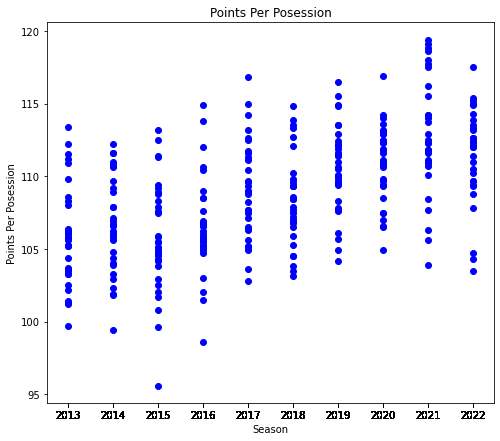

In [39]:
plt.figure(figsize = (8,7))
plt.plot(pace['year'], pace['OFFENSE: Pts/Poss'], 'bo')
plt.title('Points Per Posession')
plt.ylabel('Points Per Posession')
plt.xlabel('Season')
plt.xticks(pace['year']);

C:\Users\aorfa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


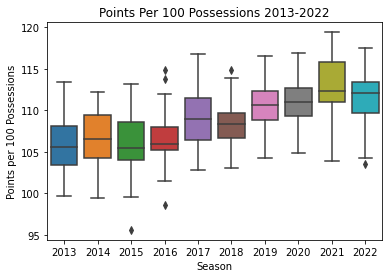

In [40]:
sns.boxplot(pace['year'], pace['OFFENSE: Pts/Poss'])
plt.title('Points Per 100 Possessions 2013-2022')
plt.ylabel('Points per 100 Possessions')
plt.xlabel('Season')
plt.savefig("./Visuals/100 Possessions boxplots.jpg", bbox_inches="tight", dpi=100);

##### The league has gotten more and more efficient on offense. The three pointer is taking over.

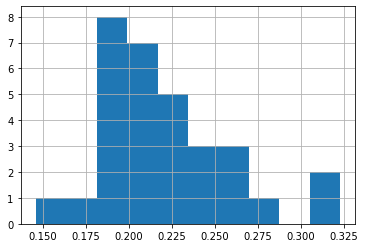

In [41]:
# Distribution for all 30 teams in 2013, what percent of their total shot attempts were three pointers?
df[df['year'] == 2013]['Frequency All Threes'].hist();

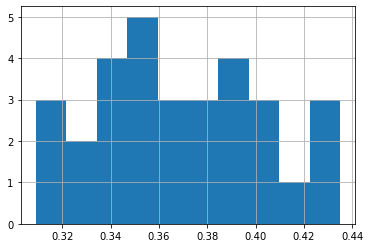

In [42]:
# Distribution for all 30 teams in 2022, what percent of their total shot attempts were three pointers?
df[df['year'] == 2022]['Frequency All Threes'].hist();

#### Put the two distributions together and you can see a stark difference.  In 2013, the outliers in terms of the high three point frequency were around .30%.  Now in 2022, the teams that are at the absolute bottom of three point frequency still are shooting around 30%.  

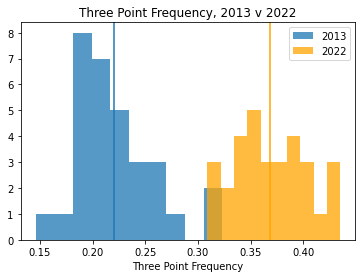

In [43]:
plt.hist(df[df['year'] == 2013]['Frequency All Threes'], alpha=.75, label = '2013')
plt.hist(df[df['year'] == 2022]['Frequency All Threes'], alpha=.75, label = '2022', color = 'orange')
plt.axvline(df[df['year'] == 2013]['Frequency All Threes'].mean())
plt.axvline(df[df['year'] == 2022]['Frequency All Threes'].mean(), color = 'orange')
plt.title('Three Point Frequency, 2013 v 2022')
plt.xlabel('Three Point Frequency')
plt.legend();